<a href="https://colab.research.google.com/github/aMares1108/SegmentacionCodo/blob/main/MetodoDelCodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Método del codo

Método para determinar el número óptimo de clústers en un dataset.

La metodología establece que el número óptimo es donde la curva comienza a tener una pendiente constante.

0
1
2
3
4


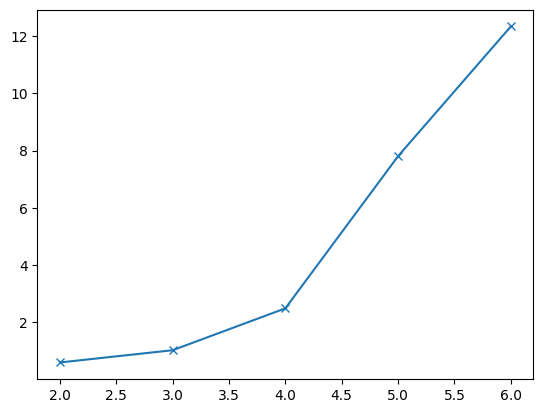

In [3]:
import cv2 as cv
# from google.colab.patches import cv2_imshow as imshow
im = cv.imread('images (2).jpeg')
im = cv.resize(im, [32, 24])

import numpy as np
from numpy import linalg as la
np.seterr(all='print')

x = im.reshape((1,-1,3))[0].astype('double')
n,m = x.shape

# Cálculo de centroides por método de Ponce

# Matriz inicial proponiendo 3 clústers
#c = 5

def Ponce(x, u, c):
  # Cálculo de centroides 
  try:
    v = np.array([
        [
          sum(x[:,j]*u[i]) for j in range(m)
        ]/sum(u[i]) for i in range(c)
      ]     
    ) # C-Cluster 1, C-Cluster 2, C-Cluster 3
  except Warning as e:
    print(e)

  # Cálculo de las distancias
  d = la.norm(
    np.tile(x,(c,1,1))-
    np.tile(v.reshape((1,c,m)).swapaxes(0,1),(n,1))
    , axis=2)

  # Actualización de U
  d = d.argmin(0).reshape(1,-1)
  u = np.zeros_like(u)
  grid = np.indices((1,n))[1]
  u[d,grid] = 1

  return v,u,d

def km(c,x):
  u = np.random.normal(size=(c,n-c))
  u = u/u.sum(0) # Normalización de la matriz
  d = u.argmax(0).reshape(1,-1)
  u = np.zeros_like(u)
  grid = np.indices((1,n-c))[1]
  u[d,grid] = 1
  u = np.concatenate((u,np.eye(c)), axis=1)

  # Cálculo de centroides inicial
  v, u, df = Ponce(x,u, c)

  u_ = np.zeros_like(u)
  eps = 0
  norm = 1
  while(norm>eps):
    u_ = u
    v, u, df = Ponce(x,u, c)
    norm = la.norm(u-u_)

  return v,u,df.min(0)

import matplotlib.pyplot as pl

pl.figure()
k = 5
d_ = np.zeros(k)
for i in range(k):
  v,u,d = km(i+2,x)
  d_[i] = (d**2).sum()/n
  print(i)

pl.plot(np.arange(k)+2, d_, marker='x')
pl.show()